In [1]:
%matplotlib inline
import os
os.chdir("..")

## Load Puzzle Dataset

In [11]:
from pathlib import Path
DATASET_PATH = Path('dataset/sudoku17.txt')
with open(DATASET_PATH, 'r') as f:
    puzzle_strings = f.read().splitlines()


## Experiments

### Extensive Solver

- Employ all available strategies and record the maximum number of solvable problems.
- Observe any correlation between number of clues and difficulty level.

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

from sudoku.sudoku import SudokuPuzzle
from sudoku.solver import SudokuSolver, Strategy

Unique value: [17]


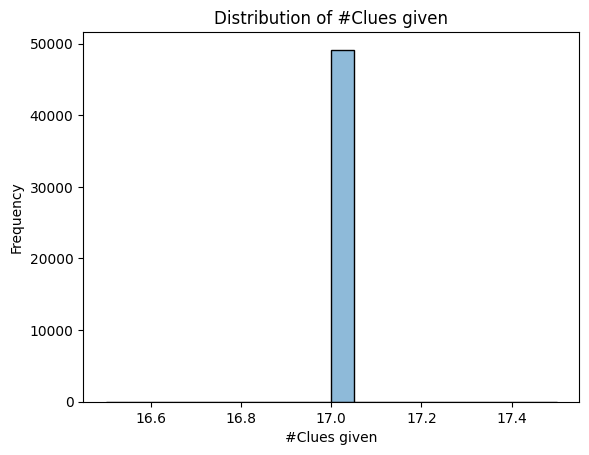

In [5]:
# Collect frequency of number of given clue
clues_list = [
    sum(1 for char in puzzle_string if char != '0')
    for puzzle_string in puzzle_strings
]
print (f'Unique value: {sorted(set(clues_list))}')
clue_distribution = {}
for clues in clues_list:
    if clues not in clue_distribution:
        clue_distribution[clues] = 0
    clue_distribution[clues] += 1

# Plot histogram
sns.histplot(
    clues_list,
    bins=20,
    kde=True  # add density curve
)

# Labels and title
plt.xlabel("#Clues given")
plt.ylabel("Frequency")
plt.title("Distribution of #Clues given")

plt.show()

In [ ]:
from sudoku.sudoku import SudokuPuzzle
from sudoku.solver import SudokuSolver, Strategy

number_of_solved = 0
number_of_puzzles = len(puzzle_strings)
strategies = [
    Strategy.UniqueStrategy(),
    Strategy.HiddenCandidatePairStrategy(), 
    Strategy.HiddenCandidateTripletStrategy(),
    Strategy.NakedPairStrategy(),
    Strategy.BoxLineInterpolationStrategy(),
    Strategy.BoxLineExtrapolationStrategy(),
    Strategy.RectangleCornerReductionsStrategy(),
    ]

solver = SudokuSolver(strategies)
for index, puzzle_string in enumerate(puzzle_strings):
    puzzle = SudokuPuzzle(sudoku_string=puzzle_string)
    puzzle = solver.solve(puzzle)
    number_of_solved += int(puzzle.is_solved())
    if (index + 1) % 1000 == 0:
        print (f"Processed {index + 1} problems | Solved: {number_of_solved}")

print(f"Solved {number_of_solved} out of {number_of_puzzles} puzzles.")

Processed 1000 problems | Solved: 953
Processed 2000 problems | Solved: 1907
Processed 3000 problems | Solved: 2850
Processed 4000 problems | Solved: 3789
Processed 5000 problems | Solved: 4731
Processed 6000 problems | Solved: 5664
Processed 7000 problems | Solved: 6607
Processed 8000 problems | Solved: 7554
Processed 9000 problems | Solved: 8500
Processed 10000 problems | Solved: 9451
Processed 11000 problems | Solved: 10392
Processed 12000 problems | Solved: 11340
Processed 13000 problems | Solved: 12290
Processed 14000 problems | Solved: 13232
Processed 15000 problems | Solved: 14183
Processed 16000 problems | Solved: 15129
Processed 17000 problems | Solved: 16077
Processed 18000 problems | Solved: 17023
Processed 19000 problems | Solved: 17962
Processed 20000 problems | Solved: 18902
Processed 21000 problems | Solved: 19848
Processed 22000 problems | Solved: 20804
Processed 23000 problems | Solved: 21741
Processed 24000 problems | Solved: 22674
Processed 25000 problems | Solved: 2

## Efficient Strategies

Should you have limited number of strategies can be chosen from, what are the best combinations?

In [19]:
from itertools import combinations

def all_subsets(lst):
    return [
        list(combo)
        for r in range(len(lst) + 1)
        for combo in combinations(lst, r)
    ][1:] # don't count empty set

strategies = [
    Strategy.UniqueStrategy(),
    Strategy.HiddenCandidatePairStrategy(), 
    Strategy.HiddenCandidateTripletStrategy(),
    Strategy.NakedPairStrategy(),
    Strategy.BoxLineInterpolationStrategy(),
    Strategy.BoxLineExtrapolationStrategy(),
    Strategy.RectangleCornerReductionsStrategy(),
    ]
strategy_combinations = all_subsets(strategies)
combination_solvable_map = dict()
TESTED_NUMBER_OF_PUZZLE = 5000
TESTED_PUZZLE_STRINGS = puzzle_strings[:TESTED_NUMBER_OF_PUZZLE]

for combination in strategy_combinations:
    combination_name = ', '.join([str(strat) for strat in combination])

    number_of_solved = 0
    number_of_puzzles = len(TESTED_PUZZLE_STRINGS)
    solver = SudokuSolver(strategies=combination)
    for index, puzzle_string in enumerate(TESTED_PUZZLE_STRINGS):
        puzzle = SudokuPuzzle(sudoku_string=puzzle_string)
        puzzle = solver.solve(puzzle)
        number_of_solved += int(puzzle.is_solved())
    
    print (combination_name)
    print(f"Solved {number_of_solved} out of {number_of_puzzles} puzzles.")
    combination_solvable_map[combination_name] = number_of_solved

UniqueStrategy
Solved 2261 out of 5000 puzzles.
HiddenCandidatePairStrategy
Solved 0 out of 5000 puzzles.
HiddenCandidateTripletStrategy
Solved 0 out of 5000 puzzles.
NakedPairStrategy
Solved 0 out of 5000 puzzles.
BoxLineInterpolationStrategy
Solved 0 out of 5000 puzzles.
BoxLineExtrapolationStrategy
Solved 0 out of 5000 puzzles.
RectangleCornerReductionsStrategy
Solved 0 out of 5000 puzzles.
UniqueStrategy, HiddenCandidatePairStrategy
Solved 3220 out of 5000 puzzles.
UniqueStrategy, HiddenCandidateTripletStrategy
Solved 2265 out of 5000 puzzles.
UniqueStrategy, NakedPairStrategy
Solved 2839 out of 5000 puzzles.
UniqueStrategy, BoxLineInterpolationStrategy
Solved 3689 out of 5000 puzzles.
UniqueStrategy, BoxLineExtrapolationStrategy
Solved 3620 out of 5000 puzzles.
UniqueStrategy, RectangleCornerReductionsStrategy
Solved 4186 out of 5000 puzzles.
HiddenCandidatePairStrategy, HiddenCandidateTripletStrategy
Solved 0 out of 5000 puzzles.
HiddenCandidatePairStrategy, NakedPairStrategy
Sol

In [20]:
strats_number_best_combination_map = dict()
strats_number_best_solvable_map = dict()

for combination_name, solvable in combination_solvable_map.items():
    number_of_strats = len(combination_name.split(', '))

    current_best_solvable = strats_number_best_solvable_map.get(number_of_strats, -1)
    if (solvable > current_best_solvable):
        strats_number_best_solvable_map[number_of_strats] = solvable
        strats_number_best_combination_map[number_of_strats] = combination_name

for number_of_strats, best_combination in strats_number_best_combination_map.items():
    best_solvable = strats_number_best_solvable_map.get(number_of_strats)
    print (f'No strats: {number_of_strats} | Solvable: {best_solvable} | Combination: {best_combination}')

No strats: 1 | Solvable: 2261 | Combination: UniqueStrategy
No strats: 2 | Solvable: 4186 | Combination: UniqueStrategy, RectangleCornerReductionsStrategy
No strats: 3 | Solvable: 4667 | Combination: UniqueStrategy, BoxLineExtrapolationStrategy, RectangleCornerReductionsStrategy
No strats: 4 | Solvable: 4722 | Combination: UniqueStrategy, HiddenCandidatePairStrategy, BoxLineExtrapolationStrategy, RectangleCornerReductionsStrategy
No strats: 5 | Solvable: 4732 | Combination: UniqueStrategy, HiddenCandidatePairStrategy, BoxLineInterpolationStrategy, BoxLineExtrapolationStrategy, RectangleCornerReductionsStrategy
No strats: 6 | Solvable: 4732 | Combination: UniqueStrategy, HiddenCandidatePairStrategy, HiddenCandidateTripletStrategy, NakedPairStrategy, BoxLineExtrapolationStrategy, RectangleCornerReductionsStrategy
No strats: 7 | Solvable: 4731 | Combination: UniqueStrategy, HiddenCandidatePairStrategy, HiddenCandidateTripletStrategy, NakedPairStrategy, BoxLineInterpolationStrategy, BoxLin

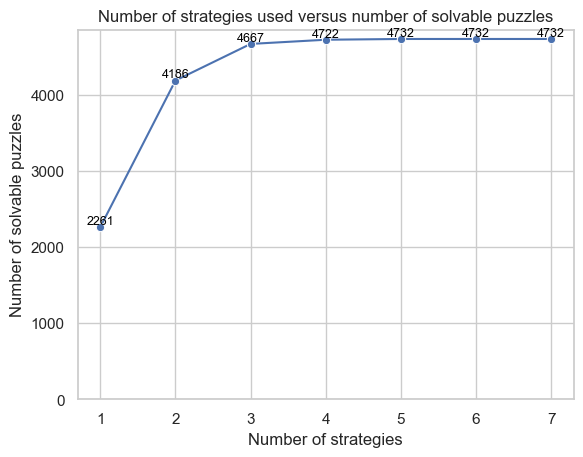

In [11]:
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt

# Data
strats_number_best_solvable_map = {
    1: 2261,
    2: 4186,
    3: 4667,
    4: 4722,
    5: 4732,
    6: 4732,
    7: 4732,
}
x = list(strats_number_best_solvable_map.keys())
y = list(strats_number_best_solvable_map.values())

# Create seaborn lineplot
sns.set(style="whitegrid")
ax = sns.lineplot(x=x, y=y, marker="o")

# Add text labels (y-values) above each point
for i, val in enumerate(y):
    ax.text(x[i], val + 0.5, str(val), ha='center', va='bottom', fontsize=9, color='black')

# Force x-axis to show only recorded value
ax.set_xticks(x)
ax.set_ylim(bottom=0)

# Labels and title
plt.xlabel("Number of strategies")
plt.ylabel("Number of solvable puzzles")
plt.title("Number of strategies used versus number of solvable puzzles")

plt.show()